
# NFL Offensive Team Data Exploration

Dataset: Kaggle dataset on NFL offensive data from 2003-2023. 

Business Understanding/Goal: Get some information about offensive football in recent history!

## 1. Import Libraries

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 200)

## 2. Load the Dataset

In [30]:
df = pd.read_csv("data/team_stats_2003_2023.csv")

## 3. Understand the Data

In [31]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  672 non-null    int64  
 1   team                  672 non-null    object 
 2   wins                  672 non-null    int64  
 3   losses                672 non-null    int64  
 4   win_loss_perc         672 non-null    float64
 5   points                672 non-null    int64  
 6   points_opp            672 non-null    int64  
 7   points_diff           672 non-null    int64  
 8   mov                   352 non-null    float64
 9   g                     672 non-null    int64  
 10  total_yards           672 non-null    int64  
 11  plays_offense         672 non-null    int64  
 12  yds_per_play_offense  672 non-null    float64
 13  turnovers             672 non-null    int64  
 14  fumbles_lost          672 non-null    int64  
 15  first_down            6

Columns that seem useful:
year, team, wins, losses, win_loss_perc, points, points_diff, total_yards, yds_per_play_offense, turnovers, pass_att, pass_net_yds_per_att, pass_td, pass_int, fumbles_lost, rush_att, rush_td, rush_yds_per_att, penalties,
penalties_yds, score_pct, turnover_pct, exp_pts_tot

In [ ]:
df.head(10)
# df.describe()

## 4. Data Processing/Preparation

### 4.1. Dropping Unnecessary Columns

In [3]:
df.columns

Index(['year', 'team', 'wins', 'losses', 'win_loss_perc', 'points',
       'points_opp', 'points_diff', 'mov', 'g', 'total_yards', 'plays_offense',
       'yds_per_play_offense', 'turnovers', 'fumbles_lost', 'first_down',
       'pass_cmp', 'pass_att', 'pass_yds', 'pass_td', 'pass_int',
       'pass_net_yds_per_att', 'pass_fd', 'rush_att', 'rush_yds', 'rush_td',
       'rush_yds_per_att', 'rush_fd', 'penalties', 'penalties_yds', 'pen_fd',
       'score_pct', 'turnover_pct', 'exp_pts_tot', 'ties'],
      dtype='object')

In [8]:
df = df[['year', 'team', 'win_loss_perc', 'points',
       'points_diff', 'total_yards', 'g',
       'yds_per_play_offense', 'turnovers', 'fumbles_lost',
       'pass_att', 'pass_yds', 'pass_td', 'pass_int',
       'pass_net_yds_per_att', 'rush_att', 'rush_yds', 'rush_td',
       'rush_yds_per_att', 'penalties', 'penalties_yds']]
df.head(5)

,year,team,win_loss_perc,points,points_diff,total_yards,g,yds_per_play_offense,turnovers,fumbles_lost,pass_att,pass_yds,pass_td,pass_int,pass_net_yds_per_att,rush_att,rush_yds,rush_td,rush_yds_per_att,penalties,penalties_yds
0,2003,New England Patriots,0.875,348,110,5039,16,4.8,24,11,537,3432,23,13,6.0,473,1607,9,3.4,111,998
1,2003,Miami Dolphins,0.625,311,50,4609,16,4.8,34,15,450,2792,17,19,5.8,487,1817,14,3.7,103,913
2,2003,Buffalo Bills,0.375,243,-36,4348,16,4.4,34,17,502,2684,11,17,4.9,427,1664,13,3.9,106,891
3,2003,New York Jets,0.375,283,-16,4951,16,5.3,20,6,496,3316,20,14,6.3,409,1635,8,4.0,69,550
4,2003,Baltimore Ravens,0.625,391,110,4929,16,4.9,38,19,415,2255,16,19,4.9,552,2674,18,4.8,126,970


Got rid of wins, losses, points_opp, mov, plays_offense, etc.

### 4.2 Checking for Duplicates

In [ ]:
df.duplicated().sum()

There are no duplicated rows so I don't have to do anything with it.

### 4.3 Null Data

In [ ]:
df.isna().sum()

There is no null data.

I am satisfied with how the data looks and because it is all numerical besides the teams, I do not have to do any string formatting

### Question 1: How has the pass/run balance changed throughout the years?

In [ ]:
recent = df.loc[df["year"]==2023]
recent["pass_att"].mean()

Teams averaged 572 pass attempts in 2023. 

In [ ]:
oldest = df.loc[df["year"]==2003]
oldest["pass_att"].mean()

Teams averaged 515 pass attempts in 2003, so we have seen an increase in how many times teams throw the ball. 

In [26]:
oldest["g"].mean()

16.0

In [29]:
recent["g"].mean()

17.0

However, the schedule length also increased from 16 regular season games to 17 in 2021. One more game could also lead to an increase in pass attempts. A more fitting way to evaluate how much a team is passing the ball vs running the ball is to look at the ratio of the two. 

In [30]:
oldest["pass_att"].mean() / oldest["rush_att"].mean()

1.136821064240419

In [31]:
recent["pass_att"].mean() / recent["rush_att"].mean()

1.253936738326715

The league has shifted to a more pass heavy offensive strategy, but not by much.

Let's look at which year was the most pass-heavy.

In [11]:
# Create new column with this ratio
df["pass_to_run"] = df["pass_att"] / df["rush_att"]
df.head(5)

,year,team,win_loss_perc,points,points_diff,total_yards,g,yds_per_play_offense,turnovers,fumbles_lost,pass_att,pass_yds,pass_td,pass_int,pass_net_yds_per_att,rush_att,rush_yds,rush_td,rush_yds_per_att,penalties,penalties_yds,pass_to_run
0,2003,New England Patriots,0.875,348,110,5039,16,4.8,24,11,537,3432,23,13,6.0,473,1607,9,3.4,111,998,1.135307
1,2003,Miami Dolphins,0.625,311,50,4609,16,4.8,34,15,450,2792,17,19,5.8,487,1817,14,3.7,103,913,0.924025
2,2003,Buffalo Bills,0.375,243,-36,4348,16,4.4,34,17,502,2684,11,17,4.9,427,1664,13,3.9,106,891,1.175644
3,2003,New York Jets,0.375,283,-16,4951,16,5.3,20,6,496,3316,20,14,6.3,409,1635,8,4.0,69,550,1.212714
4,2003,Baltimore Ravens,0.625,391,110,4929,16,4.9,38,19,415,2255,16,19,4.9,552,2674,18,4.8,126,970,0.751812


In [12]:
grouped = df.groupby("year")[["pass_to_run"]].mean()
grouped.loc[grouped["pass_to_run"] == grouped["pass_to_run"].max()]

,pass_to_run
year,
2016,1.391212


The league was the most pass heavy in 2016

In [64]:
grouped.loc[grouped["pass_to_run"] == grouped["pass_to_run"].min()]

,pass_to_run
year,
2003,1.152893


The league was most run heavy in 2003

<Axes: title={'center': 'Pass:Run Ratio vs Year'}, xlabel='year', ylabel='pass_to_run'>

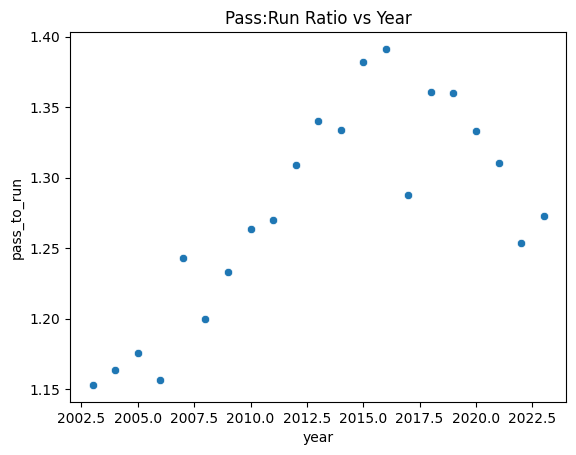

In [14]:
plt.title("Pass:Run Ratio vs Year")

sns.scatterplot(data=grouped, x="year", y="pass_to_run")


Something weird happened with the years on the X-axis but we can see the general trend over the last 20 years. Teams have started to run the ball more in recent years. 

### Question 2: How are turnovers and win percentage related? 

In [25]:
df["turnovers"].mean()

24.708333333333332

<Axes: title={'center': 'Win Percentage vs Turnovers'}, xlabel='turnovers', ylabel='win_loss_perc'>

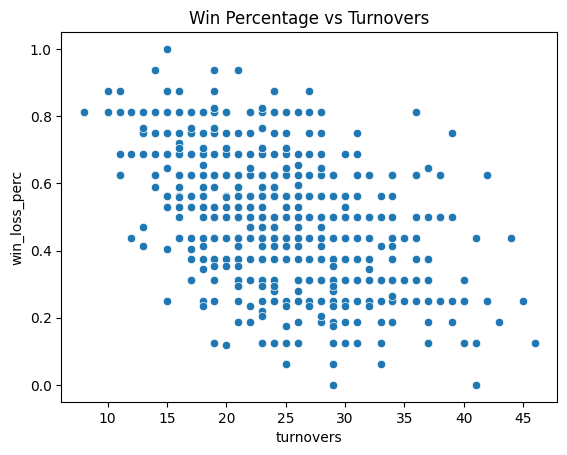

In [22]:
plt.title("Win Percentage vs Turnovers")
sns.scatterplot(data=df, x="turnovers", y="win_loss_perc")

Pretty clear inverse relationship. Typicaly the more you turn the ball over, the worse you do. 

In [18]:
df.loc[df["win_loss_perc"] == df["win_loss_perc"].max()]

,year,team,win_loss_perc,points,points_diff,total_yards,g,yds_per_play_offense,turnovers,fumbles_lost,pass_att,pass_yds,pass_td,pass_int,pass_net_yds_per_att,rush_att,rush_yds,rush_td,rush_yds_per_att,penalties,penalties_yds,pass_to_run
128,2007,New England Patriots,1.0,589,315,6580,16,6.2,15,6,586,4731,50,9,7.8,451,1849,17,4.1,78,690,1.299335


The 2007 Patriots went undefeated and only turned the ball over 15 times

In [19]:
df.loc[df["win_loss_perc"] == df["win_loss_perc"].min()]

,year,team,win_loss_perc,points,points_diff,total_yards,g,yds_per_play_offense,turnovers,fumbles_lost,pass_att,pass_yds,pass_td,pass_int,pass_net_yds_per_att,rush_att,rush_yds,rush_td,rush_yds_per_att,penalties,penalties_yds,pass_to_run
183,2008,Detroit Lions,0.0,268,-249,4292,16,4.7,29,10,509,2960,18,19,5.3,352,1332,10,3.8,88,729,1.446023
455,2017,Cleveland Browns,0.0,234,-176,4942,16,4.9,41,13,574,3228,15,28,5.2,384,1714,11,4.5,110,924,1.494792


The 2008 Lions and 2017 Browns did not win any games and averaged 35 turnovers (above average). 

### Question 3: How do penalties impact a team's success?

In [26]:
df["penalties"].mean()

101.49404761904762

<Axes: title={'center': 'Win percentage vs Penalties'}, xlabel='penalties', ylabel='win_loss_perc'>

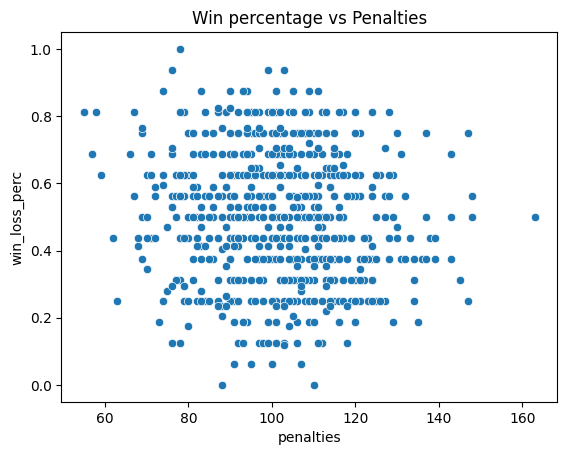

In [23]:
plt.title("Win percentage vs Penalties")
sns.scatterplot(data=df, x="penalties", y="win_loss_perc")

This data is very inconclusive.

In [27]:
df["penalties_yds"].mean()

849.5014880952381

In [28]:
df["penalties_yds"].mean() / df["penalties"].mean()

8.369963638496275

This shows the average yds per penalty is around 8.4. Just an interesting fact.

<Axes: title={'center': 'Win percentage vs Penalty Yards'}, xlabel='penalties_yds', ylabel='win_loss_perc'>

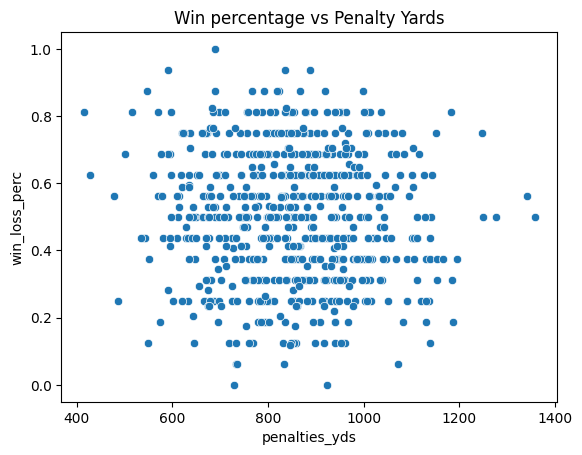

In [24]:
plt.title("Win percentage vs Penalty Yards")
sns.scatterplot(data=df, x="penalties_yds", y="win_loss_perc")

Again, the data is very inconclusive. This graph suggests that penalties do not have a huge impact on team success. 

### Future Steps

Uses:
* analyze what stats lead to success for football teams
* update with future years

Machine Learning:
* would be useful
* could predict what ratio of run to pass leads to the most success for example